In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')


# import dataset
mydata = pd.read_csv("H2HBABBA1115.csv")
mydata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S trust,2019-07-03 00:00:00,2019.0,1.929501e+09,2019-06-18,20190617,20190618,20190703.0,USD,RV,1.0,NaN,38501.90,20190618.0,NAA8,1.929501e+09,0
1,U001,0200418007,AM corporation,NaN,2020.0,1.930839e+09,2020-05-07,20200504,20200507,20200522.0,USD,RV,1.0,NaN,4277.81,20200507.0,NAA8,1.930839e+09,1
2,U001,0200152991,JET trust,2019-09-20 00:00:00,2019.0,1.929830e+09,2019-09-06,20190905,20190906,20190921.0,USD,RV,1.0,NaN,16211.35,20190906.0,NAA8,1.929830e+09,0
3,U001,0200762950,HAR corporation,2019-11-05 00:00:00,2019.0,1.930036e+09,2019-10-22,20191021,20191022,20191106.0,USD,RV,1.0,NaN,167077.92,20191022.0,NAA8,1.930036e+09,0
4,U001,0200793830,M trust,2019-09-13 00:00:00,2019.0,1.929808e+09,2019-08-29,20190829,20190829,20190913.0,USD,RV,1.0,NaN,74305.60,20190829.0,NAA8,1.929808e+09,0


# Pre-Processing

### Seperate Train and main_test

In [2]:
# seperate Train and main_test into different set one not containing null values and one containing the null values respectively.

Train = mydata[mydata.clear_date.isnull()==False]
main_Test = mydata[mydata.clear_date.isnull()]
main_Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200418007,AM corporation,NaN,2020.0,1.930839e+09,2020-05-07,20200504,20200507,20200522.0,USD,RV,1.0,NaN,4277.81,20200507.0,NAA8,1.930839e+09,1
11,CA02,CCU001,KRAFT us,NaN,2020.0,2.960624e+09,2020-03-25,20200325,20200325,20200501.0,CAD,RV,1.0,NaN,17336.88,20200327.0,NAG2,2.960624e+09,1
13,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930646e+09,2020-03-12,20200312,20200312,20200327.0,USD,RV,1.0,NaN,16361.42,20200312.0,NAH4,1.930646e+09,1
14,U001,0200020431,DEC foundation,NaN,2020.0,1.930818e+09,2020-04-23,20200423,20200423,20200423.0,USD,RV,1.0,NaN,14538.19,20200416.0,NAM1,1.930818e+09,1
20,U001,0200803720,DEC co,NaN,2020.0,1.930820e+09,2020-04-23,20200423,20200423,20200509.0,USD,RV,1.0,NaN,1171.00,20200416.0,NAM4,1.930820e+09,1


In [3]:
#checking the "Train" dataset now "Train" dataset contain any null values of "clear_date" or not.

Train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    9
isOpen                        0
dtype: int64

In [4]:
#checking the size of both "Train" and "main_test" dataset

Train.shape, main_Test.shape

((40000, 19), (10000, 19))

### Converting Object to DateTime

In [5]:
# converting object to datetime

Train['document_create_date'] = pd.to_datetime(Train['document_create_date'],format='%Y%m%d')
Train['document_create_date.1'] = pd.to_datetime(Train['document_create_date.1'],format='%Y%m%d')
Train['due_in_date'] = pd.to_datetime(Train['due_in_date'],format='%Y%m%d')
Train['baseline_create_date'] = pd.to_datetime(Train['baseline_create_date'],format='%Y%m%d')
Train['clear_date'] = pd.to_datetime(Train['clear_date'])
Train['posting_date'] = pd.to_datetime(Train['posting_date'])

In [6]:
Train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S trust,2019-07-03,2019.0,1.929501e+09,2019-06-18,2019-06-17,2019-06-18,2019-07-03,USD,RV,1.0,NaN,38501.90,2019-06-18,NAA8,1.929501e+09,0
2,U001,0200152991,JET trust,2019-09-20,2019.0,1.929830e+09,2019-09-06,2019-09-05,2019-09-06,2019-09-21,USD,RV,1.0,NaN,16211.35,2019-09-06,NAA8,1.929830e+09,0
3,U001,0200762950,HAR corporation,2019-11-05,2019.0,1.930036e+09,2019-10-22,2019-10-21,2019-10-22,2019-11-06,USD,RV,1.0,NaN,167077.92,2019-10-22,NAA8,1.930036e+09,0
4,U001,0200793830,M trust,2019-09-13,2019.0,1.929808e+09,2019-08-29,2019-08-29,2019-08-29,2019-09-13,USD,RV,1.0,NaN,74305.60,2019-08-29,NAA8,1.929808e+09,0
5,U001,0200772595,SAFEW trust,2019-05-28,2019.0,1.929294e+09,2019-05-13,2019-05-11,2019-05-13,2019-05-28,USD,RV,1.0,NaN,24967.00,2019-05-13,NAA8,1.929294e+09,0


In [7]:
#Sorting the data according to the "posting_date"

Train.sort_values(by='posting_date')

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
13422,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,4106.09,2018-12-30,NAH4,1.928534e+09,0
41397,U001,0200707005,KING S trust,2019-01-14,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,28351.93,2018-12-30,NAA8,1.928534e+09,0
43153,U001,0200772670,ASSOCIAT corp,2019-01-14,2019.0,1.928536e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,880.87,2018-12-30,NAU5,1.928536e+09,0
39161,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,53.60,2018-12-30,NAH4,1.928541e+09,0
29172,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,3471.68,2018-12-30,NAH4,1.928533e+09,0
34946,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,23504.45,2018-12-30,NAH4,1.928540e+09,0
17582,U001,200891601,POWE corp,2019-02-07,2019.0,1.928537e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-29,USD,RV,1.0,NaN,83568.00,2018-12-30,NAD5,1.928537e+09,0
8852,U001,0200555117,BURR co,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,62087.30,2018-12-30,NAA8,1.928541e+09,0
47051,U001,0200726979,BJ'S associates,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,258.51,2018-12-30,NAA8,1.928541e+09,0
36620,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,4474.69,2018-12-30,NAH4,1.928543e+09,0


### Checking the Number of Different Values Present int the Column

In [8]:
print(dict(Train['document type'].value_counts()))
print(dict(Train['area_business'].value_counts()))
print(dict(Train['posting_id'].value_counts()))
print(dict(Train['isOpen'].value_counts()))

{'RV': 39991, 'X2': 9}
{}
{1.0: 40000}
{0: 40000}


### Drop

In [9]:
# Drop those column either they are null, constant, and there count are very very less

Train.drop(['area_business','posting_id','document type','isOpen'], axis = 1, inplace= True)

In [10]:
Train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200707005,KING S trust,2019-07-03,2019.0,1.929501e+09,2019-06-18,2019-06-17,2019-06-18,2019-07-03,USD,38501.90,2019-06-18,NAA8,1.929501e+09
2,U001,0200152991,JET trust,2019-09-20,2019.0,1.929830e+09,2019-09-06,2019-09-05,2019-09-06,2019-09-21,USD,16211.35,2019-09-06,NAA8,1.929830e+09
3,U001,0200762950,HAR corporation,2019-11-05,2019.0,1.930036e+09,2019-10-22,2019-10-21,2019-10-22,2019-11-06,USD,167077.92,2019-10-22,NAA8,1.930036e+09
4,U001,0200793830,M trust,2019-09-13,2019.0,1.929808e+09,2019-08-29,2019-08-29,2019-08-29,2019-09-13,USD,74305.60,2019-08-29,NAA8,1.929808e+09
5,U001,0200772595,SAFEW trust,2019-05-28,2019.0,1.929294e+09,2019-05-13,2019-05-11,2019-05-13,2019-05-28,USD,24967.00,2019-05-13,NAA8,1.929294e+09


In [11]:
# Checking the Unique Values

Train.nunique()

business_code                 6
cust_number                1365
name_customer              3921
clear_date                  403
buisness_year                 2
doc_id                    39022
posting_date                423
document_create_date        426
document_create_date.1      423
due_in_date                 493
invoice_currency              2
total_open_amount         35488
baseline_create_date        433
cust_payment_terms           73
invoice_id                39013
dtype: int64

### Checking the info

In [12]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49998
Data columns (total 15 columns):
business_code             40000 non-null object
cust_number               40000 non-null object
name_customer             40000 non-null object
clear_date                40000 non-null datetime64[ns]
buisness_year             40000 non-null float64
doc_id                    40000 non-null float64
posting_date              40000 non-null datetime64[ns]
document_create_date      40000 non-null datetime64[ns]
document_create_date.1    40000 non-null datetime64[ns]
due_in_date               40000 non-null datetime64[ns]
invoice_currency          40000 non-null object
total_open_amount         40000 non-null float64
baseline_create_date      40000 non-null datetime64[ns]
cust_payment_terms        40000 non-null object
invoice_id                39991 non-null float64
dtypes: datetime64[ns](6), float64(4), object(5)
memory usage: 4.9+ MB


In [13]:
#  Checking now any null value present or not

Train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                9
dtype: int64

### Checking two Column similar or Not

In [14]:
#  Checking doc_id same or invoice_id same or not.
# We store the result in "equal" column and then check.

comparison_column = np.where(Train['doc_id'] == Train['invoice_id'], True, False)
comparison_column
Train["equal"] = comparison_column
print(dict(Train['equal'].value_counts()))

{True: 39991, False: 9}


In [15]:
# Droping the "invoice" and "equal" column

Train.drop(['invoice_id','equal'], axis = 1, inplace = True)

### Creating Target Column

In [16]:
# "Delay_Day" is our Target Column

import datetime as date
Train['Delay_Day'] = (Train.clear_date - Train.due_in_date).dt.days
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49998
Data columns (total 15 columns):
business_code             40000 non-null object
cust_number               40000 non-null object
name_customer             40000 non-null object
clear_date                40000 non-null datetime64[ns]
buisness_year             40000 non-null float64
doc_id                    40000 non-null float64
posting_date              40000 non-null datetime64[ns]
document_create_date      40000 non-null datetime64[ns]
document_create_date.1    40000 non-null datetime64[ns]
due_in_date               40000 non-null datetime64[ns]
invoice_currency          40000 non-null object
total_open_amount         40000 non-null float64
baseline_create_date      40000 non-null datetime64[ns]
cust_payment_terms        40000 non-null object
Delay_Day                 40000 non-null int64
dtypes: datetime64[ns](6), float64(3), int64(1), object(5)
memory usage: 4.9+ MB


## Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = Train.drop(['Delay_Day'],axis=1)

In [19]:
y = Train['Delay_Day']

### Splitting into Train, Val and Test

In [20]:
# Split into x_train, y_train
#             x_interest, y_interest

x_train,x_intertest , y_train, y_intertest = train_test_split(x,y,test_size=0.3, random_state=0, shuffle=False)

In [21]:
#   spliting into  x_val, y_val
#             x_test, y_test

x_val,x_test , y_val, y_test = train_test_split(x_intertest,y_intertest,test_size=0.5, random_state=0, shuffle=False)

In [22]:
#Checking the shape of x_train, y_train, x_val, y_val, x_test and y_test

x_train.shape, y_train.shape, x_val.shape , y_val.shape , x_test.shape, y_test.shape

((28000, 14), (28000,), (6000, 14), (6000,), (6000, 14), (6000,))

## EDA

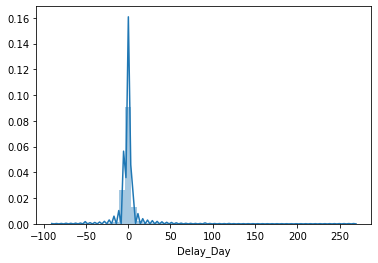

In [23]:
#Checking Graph of y_train i.e our graph is right Skewed or left Skewed
# This is Right Skewed Graph

sns.distplot(y_train)

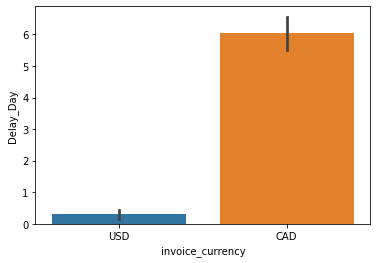

In [24]:
# BarPlot between "invioice_currency" with "Delay_Day"
# Delays in CAD is more than USD

sns.barplot(data=x_train.merge(y_train,on=x_train.index),x='invoice_currency',y='Delay_Day')

In [25]:
# Describing what is the mean, count, standard deviation, minimum, maximum value int y_train

y_train.describe()

count    28000.000000
mean         0.743393
std         10.830708
min        -89.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        268.000000
Name: Delay_Day, dtype: float64

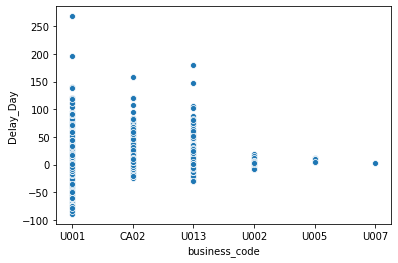

In [26]:
#Scatterplot between "Business_code" and "Delay_day"

sns.scatterplot(data=x_train.merge(y_train,on=x_train.index),x='business_code',y='Delay_Day')

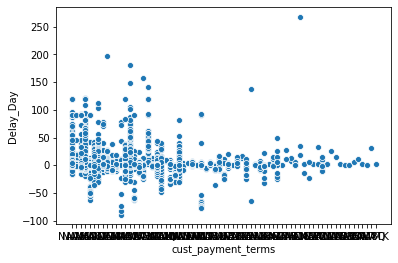

In [27]:
#Scatterplot between "cust_payment_terms" and "Delay_day"

sns.scatterplot(data=x_train.merge(y_train,on=x_train.index),x='cust_payment_terms',y='Delay_Day')

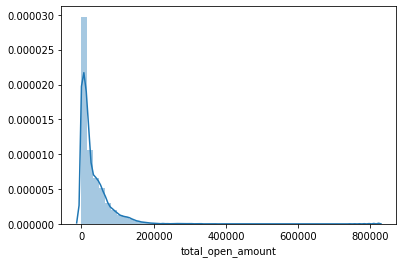

In [28]:
# Distplot of "total_open_amount"
#Right Skewed Graph

sns.distplot(x_train['total_open_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229ff479320>,
 'caps': [<matplotlib.lines.Line2D at 0x229ff4799b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229ff440ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x229ff479dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x229ff6b53c8>],
 'means': []}

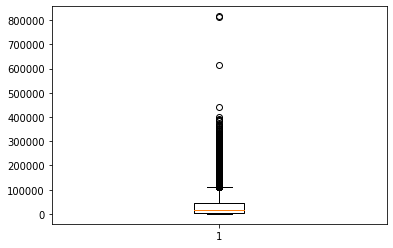

In [29]:
# Boxplot of "total_open_amount"

plt.boxplot(x_train['total_open_amount'])

In [30]:
# Checking the size of train, val and test

x_train.shape, x_val.shape, x_test.shape

((28000, 14), (6000, 14), (6000, 14))

# Feature Engineering

### Converting object into int "document_create_date.1","baseline_create_date","posting_date"

In [31]:
x_train['document_create_daysOfWeek']=x_train['document_create_date.1'].dt.dayofweek
x_train['document_create_day']=x_train['document_create_date.1'].dt.day
x_train['document_create_month']=x_train['document_create_date.1'].dt.month
x_train['document_create_quarter']=x_train['document_create_date.1'].dt.quarter
x_train['document_create_year']=x_train['document_create_date.1'].dt.year

In [32]:
x_train.shape, x_val.shape, x_test.shape

((28000, 19), (6000, 14), (6000, 14))

In [33]:
x_val['document_create_daysOfWeek']=x_val['document_create_date.1'].dt.dayofweek
x_val['document_create_day']=x_val['document_create_date.1'].dt.day
x_val['document_create_month']=x_val['document_create_date.1'].dt.month
x_val['document_create_quarter']=x_val['document_create_date.1'].dt.quarter
x_val['document_create_year']=x_val['document_create_date.1'].dt.year

x_test['document_create_daysOfWeek']=x_test['document_create_date.1'].dt.dayofweek
x_test['document_create_day']=x_test['document_create_date.1'].dt.day
x_test['document_create_month']=x_test['document_create_date.1'].dt.month
x_test['document_create_quarter']=x_test['document_create_date.1'].dt.quarter
x_test['document_create_year']=x_test['document_create_date.1'].dt.year

In [34]:
x_train.shape, x_val.shape, x_test.shape

((28000, 19), (6000, 19), (6000, 19))

In [35]:
x_train['baseline_create_date_daysOfWeek']=x_train['baseline_create_date'].dt.dayofweek
x_train['baseline_create_date_day']=x_train['baseline_create_date'].dt.day
x_train['baseline_create_date_month']=x_train['baseline_create_date'].dt.month
x_train['baseline_create_date_quarter']=x_train['baseline_create_date'].dt.quarter
x_train['baseline_create_date_year']=x_train['baseline_create_date'].dt.year

x_val['baseline_create_date_daysOfWeek']=x_val['baseline_create_date'].dt.dayofweek
x_val['baseline_create_date_day']=x_val['baseline_create_date'].dt.day
x_val['baseline_create_date_month']=x_val['baseline_create_date'].dt.month
x_val['baseline_create_date_quarter']=x_val['baseline_create_date'].dt.quarter
x_val['baseline_create_date_year']=x_val['baseline_create_date'].dt.year

x_test['baseline_create_date_daysOfWeek']=x_test['baseline_create_date'].dt.dayofweek
x_test['baseline_create_date_day']=x_test['baseline_create_date'].dt.day
x_test['baseline_create_date_month']=x_test['baseline_create_date'].dt.month
x_test['baseline_create_date_quarter']=x_test['baseline_create_date'].dt.quarter
x_test['baseline_create_date_year']=x_test['baseline_create_date'].dt.year

In [36]:
x_train.shape, x_val.shape, x_test.shape

((28000, 24), (6000, 24), (6000, 24))

In [37]:
x_train['posting_date_daysOfWeek']=x_train['posting_date'].dt.dayofweek
x_train['posting_date_day']=x_train['posting_date'].dt.day
x_train['posting_date_month']=x_train['posting_date'].dt.month
x_train['posting_date_quarter']=x_train['posting_date'].dt.quarter
x_train['posting_date_year']=x_train['posting_date'].dt.year

x_val['posting_date_daysOfWeek']=x_val['posting_date'].dt.dayofweek
x_val['posting_date_day']=x_val['posting_date'].dt.day
x_val['posting_date_month']=x_val['posting_date'].dt.month
x_val['posting_date_quarter']=x_val['posting_date'].dt.quarter
x_val['posting_date_year']=x_val['posting_date'].dt.year

x_test['posting_date_daysOfWeek']=x_test['posting_date'].dt.dayofweek
x_test['posting_date_day']=x_test['posting_date'].dt.day
x_test['posting_date_month']=x_test['posting_date'].dt.month
x_test['posting_date_quarter']=x_test['posting_date'].dt.quarter
x_test['posting_date_year']=x_test['posting_date'].dt.year

In [38]:
x_train["due_date_baseline"] = (x_train["due_in_date"] - x_train["baseline_create_date"]).dt.days
x_test["due_date_baseline"] = (x_test["due_in_date"] - x_test["baseline_create_date"]).dt.days
x_val["due_date_baseline"] = (x_val["due_in_date"] - x_val["baseline_create_date"]).dt.days

In [39]:
x_train.shape, x_val.shape, x_test.shape

((28000, 30), (6000, 30), (6000, 30))

### drop those column which are converted into int

In [40]:
# Dropping from x_train

x_train.drop(['baseline_create_date','clear_date','due_in_date','due_in_date', 'clear_date', 'document_create_date.1','document_create_date'], axis=1, inplace=True)

In [41]:
# Dropping from x_val and x_test

x_val.drop(['baseline_create_date','due_in_date', 'clear_date', 'document_create_date.1','document_create_date'], axis=1, inplace=True)
x_test.drop(['baseline_create_date','due_in_date', 'clear_date', 'document_create_date.1','document_create_date'], axis=1, inplace=True)

In [42]:
x_train.info()  #checking info how many converted into int and how any left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34962
Data columns (total 25 columns):
business_code                      28000 non-null object
cust_number                        28000 non-null object
name_customer                      28000 non-null object
buisness_year                      28000 non-null float64
doc_id                             28000 non-null float64
posting_date                       28000 non-null datetime64[ns]
invoice_currency                   28000 non-null object
total_open_amount                  28000 non-null float64
cust_payment_terms                 28000 non-null object
document_create_daysOfWeek         28000 non-null int64
document_create_day                28000 non-null int64
document_create_month              28000 non-null int64
document_create_quarter            28000 non-null int64
document_create_year               28000 non-null int64
baseline_create_date_daysOfWeek    28000 non-null int64
baseline_create_date_day       

In [43]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,invoice_currency,total_open_amount,cust_payment_terms,document_create_daysOfWeek,...,baseline_create_date_day,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_year,posting_date_daysOfWeek,posting_date_day,posting_date_month,posting_date_quarter,posting_date_year,due_date_baseline
0,U001,0200707005,KING S trust,2019.0,1.929501e+09,2019-06-18,USD,38501.90,NAA8,1,...,18,6,2,2019,1,18,6,2,2019,15
2,U001,0200152991,JET trust,2019.0,1.929830e+09,2019-09-06,USD,16211.35,NAA8,4,...,6,9,3,2019,4,6,9,3,2019,15
3,U001,0200762950,HAR corporation,2019.0,1.930036e+09,2019-10-22,USD,167077.92,NAA8,1,...,22,10,4,2019,1,22,10,4,2019,15
4,U001,0200793830,M trust,2019.0,1.929808e+09,2019-08-29,USD,74305.60,NAA8,3,...,29,8,3,2019,3,29,8,3,2019,15
5,U001,0200772595,SAFEW trust,2019.0,1.929294e+09,2019-05-13,USD,24967.00,NAA8,0,...,13,5,2,2019,0,13,5,2,2019,15


In [44]:
# checking the number of Element present

print(dict(x_train['business_code'].value_counts()))

{'U001': 25365, 'CA02': 2179, 'U013': 351, 'U002': 98, 'U005': 6, 'U007': 1}


In [45]:
# Those element whose is less in count put it into "Others"

x_train = x_train.replace(['U002','U005','U007'],'Others')

In [46]:
x_val = x_val.replace(['U002','U005','U007'],'Others')
x_test = x_test.replace(['U002','U005','U007'],'Others')

### Apply Label Encoding on "business_code"

In [47]:
from sklearn import preprocessing

business_encoder = preprocessing.LabelEncoder()
business_encoder.fit(x_train['business_code'])

LabelEncoder()

In [48]:
x_train['business_encoder'] = business_encoder.fit_transform(x_train['business_code']).astype(np.int64)
x_val['business_encoder'] = business_encoder.fit_transform(x_val['business_code']).astype(np.int64)
x_test['business_encoder'] = business_encoder.fit_transform(x_test['business_code']).astype(np.int64)

In [49]:
print(dict(x_train['cust_payment_terms'].value_counts()))

{'NAA8': 11156, 'NAH4': 7408, 'CA10': 2118, 'NAC6': 950, 'NAM4': 768, 'NAAX': 683, 'NAD1': 566, 'NAG2': 547, 'NAU5': 515, 'NAGD': 452, 'NA32': 440, 'NAX2': 389, 'NAM2': 305, 'NA10': 248, 'NAD5': 208, 'NAVE': 165, 'NAAW': 152, 'NAM1': 146, 'NAVF': 138, 'NAWU': 90, 'NAWN': 73, 'NAVR': 66, 'NAWP': 58, 'NAVQ': 56, 'CA30': 28, 'NACB': 27, 'NAUZ': 27, 'NAVM': 27, 'NA38': 24, 'NA3B': 23, 'NABG': 16, 'NAD4': 15, 'NAB1': 14, 'NA84': 13, 'C106': 12, 'NAVD': 8, 'NAVL': 7, 'NA3F': 6, 'NAUP': 4, 'NA9X': 4, 'NAD8': 4, 'NAWM': 3, 'NAV9': 3, 'NAM3': 3, 'NA31': 2, 'NAV2': 2, 'NAUN': 2, 'NATU': 2, 'NAVC': 2, 'B052': 2, 'CAB1': 2, 'NAUW': 2, 'BR12': 2, 'B112': 2, 'NATK': 1, 'NATM': 1, 'BR56': 1, 'NAUI': 1, 'NATZ': 1, 'NATH': 1, 'NAUY': 1, 'NACE': 1, 'NA25': 1, 'NATY': 1, 'NATV': 1, 'NA8Q': 1, 'NATL': 1, 'NATW': 1, 'NANC': 1}


In [50]:
# Those element whose is less in count put it into "Others"

x_train = x_train.replace(['NAVD', 'NAVL', 'NA3F', 'NA9X', 'NAUP', 'NAD8', 'NAWM', 'NAM3', 'NAV9', 'BR12', 'B112', 'NAVC', 'NAV2', 'NA31', 'NAUW', 'NAUN', 'NATU', 'B052', 'CAB1', 'BR56', 'NATL', 'NACE', 'NAUI', 'NATY', 'NAUY', 'NANC', 'NA25', 'NATW', 'NATK', 'NATH', 'NATV', 'NA8Q', 'NATM', 'NATZ'],'Others')

In [51]:
x_val = x_val.replace(['NAVD', 'NAVL', 'NA3F', 'NA9X', 'NAUP', 'NAD8', 'NAWM', 'NAM3', 'NAV9', 'BR12', 'B112', 'NAVC', 'NAV2', 'NA31', 'NAUW', 'NAUN', 'NATU', 'B052', 'CAB1', 'BR56', 'NATL', 'NACE', 'NAUI', 'NATY', 'NAUY', 'NANC', 'NA25', 'NATW', 'NATK', 'NATH', 'NATV', 'NA8Q', 'NATM', 'NATZ'],'Others')
x_test = x_test.replace(['NAVD', 'NAVL', 'NA3F', 'NA9X', 'NAUP', 'NAD8', 'NAWM', 'NAM3', 'NAV9', 'BR12', 'B112', 'NAVC', 'NAV2', 'NA31', 'NAUW', 'NAUN', 'NATU', 'B052', 'CAB1', 'BR56', 'NATL', 'NACE', 'NAUI', 'NATY', 'NAUY', 'NANC', 'NA25', 'NATW', 'NATK', 'NATH', 'NATV', 'NA8Q', 'NATM', 'NATZ'],'Others')

In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34962
Data columns (total 26 columns):
business_code                      28000 non-null object
cust_number                        28000 non-null object
name_customer                      28000 non-null object
buisness_year                      28000 non-null float64
doc_id                             28000 non-null float64
posting_date                       28000 non-null datetime64[ns]
invoice_currency                   28000 non-null object
total_open_amount                  28000 non-null float64
cust_payment_terms                 28000 non-null object
document_create_daysOfWeek         28000 non-null int64
document_create_day                28000 non-null int64
document_create_month              28000 non-null int64
document_create_quarter            28000 non-null int64
document_create_year               28000 non-null int64
baseline_create_date_daysOfWeek    28000 non-null int64
baseline_create_date_day       

In [53]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,invoice_currency,total_open_amount,cust_payment_terms,document_create_daysOfWeek,...,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_year,posting_date_daysOfWeek,posting_date_day,posting_date_month,posting_date_quarter,posting_date_year,due_date_baseline,business_encoder
0,U001,0200707005,KING S trust,2019.0,1.929501e+09,2019-06-18,USD,38501.90,NAA8,1,...,6,2,2019,1,18,6,2,2019,15,2
2,U001,0200152991,JET trust,2019.0,1.929830e+09,2019-09-06,USD,16211.35,NAA8,4,...,9,3,2019,4,6,9,3,2019,15,2
3,U001,0200762950,HAR corporation,2019.0,1.930036e+09,2019-10-22,USD,167077.92,NAA8,1,...,10,4,2019,1,22,10,4,2019,15,2
4,U001,0200793830,M trust,2019.0,1.929808e+09,2019-08-29,USD,74305.60,NAA8,3,...,8,3,2019,3,29,8,3,2019,15,2
5,U001,0200772595,SAFEW trust,2019.0,1.929294e+09,2019-05-13,USD,24967.00,NAA8,0,...,5,2,2019,0,13,5,2,2019,15,2


###  LabelEncoding of "cust_payment_terms"

In [54]:
from sklearn import preprocessing

curt_payment_encoder = preprocessing.LabelEncoder()
curt_payment_encoder.fit(x_train['cust_payment_terms'])

LabelEncoder()

In [55]:
x_train['curt_payment_encoder'] = curt_payment_encoder.fit_transform(x_train['cust_payment_terms']).astype(np.int64)
x_val['curt_payment_encoder'] = curt_payment_encoder.fit_transform(x_val['cust_payment_terms']).astype(np.int64)
x_test['curt_payment_encoder'] = curt_payment_encoder.fit_transform(x_test['cust_payment_terms']).astype(np.int64)

In [56]:
# Dropping after encoding of "cust_payment_terms" from x_train

x_train.drop(['business_code','posting_date','cust_payment_terms'], axis = 1, inplace = True)

In [57]:
# Dropping after encoding of "cust_payment_terms" from x_val and x_test

x_val.drop(['business_code','posting_date','cust_payment_terms'], axis = 1, inplace = True)
x_test.drop(['business_code','posting_date','cust_payment_terms'], axis = 1, inplace = True)

In [58]:
#Checking shape of x_train, x_val and x_test

x_train.shape, x_val.shape, x_test.shape

((28000, 24), (6000, 24), (6000, 24))

In [59]:
x_train.head()

,cust_number,name_customer,buisness_year,doc_id,invoice_currency,total_open_amount,document_create_daysOfWeek,document_create_day,document_create_month,document_create_quarter,...,baseline_create_date_quarter,baseline_create_date_year,posting_date_daysOfWeek,posting_date_day,posting_date_month,posting_date_quarter,posting_date_year,due_date_baseline,business_encoder,curt_payment_encoder
0,0200707005,KING S trust,2019.0,1.929501e+09,USD,38501.90,1,18,6,2,...,2,2019,1,18,6,2,2019,15,2,8
2,0200152991,JET trust,2019.0,1.929830e+09,USD,16211.35,4,6,9,3,...,3,2019,4,6,9,3,2019,15,2,8
3,0200762950,HAR corporation,2019.0,1.930036e+09,USD,167077.92,1,22,10,4,...,4,2019,1,22,10,4,2019,15,2,8
4,0200793830,M trust,2019.0,1.929808e+09,USD,74305.60,3,29,8,3,...,3,2019,3,29,8,3,2019,15,2,8
5,0200772595,SAFEW trust,2019.0,1.929294e+09,USD,24967.00,0,13,5,2,...,2,2019,0,13,5,2,2019,15,2,8


In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34962
Data columns (total 24 columns):
cust_number                        28000 non-null object
name_customer                      28000 non-null object
buisness_year                      28000 non-null float64
doc_id                             28000 non-null float64
invoice_currency                   28000 non-null object
total_open_amount                  28000 non-null float64
document_create_daysOfWeek         28000 non-null int64
document_create_day                28000 non-null int64
document_create_month              28000 non-null int64
document_create_quarter            28000 non-null int64
document_create_year               28000 non-null int64
baseline_create_date_daysOfWeek    28000 non-null int64
baseline_create_date_day           28000 non-null int64
baseline_create_date_month         28000 non-null int64
baseline_create_date_quarter       28000 non-null int64
baseline_create_date_year          28000 n

In [61]:
x_train.tail()

,cust_number,name_customer,buisness_year,doc_id,invoice_currency,total_open_amount,document_create_daysOfWeek,document_create_day,document_create_month,document_create_quarter,...,baseline_create_date_quarter,baseline_create_date_year,posting_date_daysOfWeek,posting_date_day,posting_date_month,posting_date_quarter,posting_date_year,due_date_baseline,business_encoder,curt_payment_encoder
34956,CCCA02,KRAFT in,2019.0,1.930117e+09,USD,34727.20,6,17,11,4,...,4,2019,6,17,11,4,2019,35,2,18
34957,0200700919,US,2019.0,1.928714e+09,USD,31692.81,3,31,1,1,...,1,2019,3,31,1,1,2019,15,2,8
34958,0200759878,SA systems,2020.0,1.930430e+09,USD,56799.49,4,24,1,1,...,1,2020,4,24,1,1,2020,45,2,32
34960,0200769623,WAL-MAR trust,2019.0,1.929827e+09,USD,10637.25,4,6,9,3,...,3,2019,4,6,9,3,2019,15,2,20
34962,0200762301,C&S WH,2019.0,1.930001e+09,USD,21119.76,5,12,10,4,...,4,2019,5,12,10,4,2019,15,2,13


In [62]:
# Dropping of "name_customer"

x_train.drop(['name_customer'], axis = 1, inplace= True)

### LabelEncoding on "cust_number"

In [63]:
from sklearn import preprocessing

cust_number_encoder = preprocessing.LabelEncoder()
cust_number_encoder.fit(x_train['cust_number'])

LabelEncoder()

In [64]:
x_train['cust_number_encoder'] = cust_number_encoder.fit_transform(x_train['cust_number']).astype(np.int64)
x_val['cust_number_encoder'] = cust_number_encoder.fit_transform(x_val['cust_number']).astype(np.int64)
x_test['cust_number_encoder'] = cust_number_encoder.fit_transform(x_test['cust_number']).astype(np.int64)

In [65]:
x_train.drop(['cust_number'], axis = 1, inplace= True)

In [66]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34962
Data columns (total 23 columns):
buisness_year                      28000 non-null float64
doc_id                             28000 non-null float64
invoice_currency                   28000 non-null object
total_open_amount                  28000 non-null float64
document_create_daysOfWeek         28000 non-null int64
document_create_day                28000 non-null int64
document_create_month              28000 non-null int64
document_create_quarter            28000 non-null int64
document_create_year               28000 non-null int64
baseline_create_date_daysOfWeek    28000 non-null int64
baseline_create_date_day           28000 non-null int64
baseline_create_date_month         28000 non-null int64
baseline_create_date_quarter       28000 non-null int64
baseline_create_date_year          28000 non-null int64
posting_date_daysOfWeek            28000 non-null int64
posting_date_day                   28000 non

### Making dummies of invoice_currency

In [67]:
data = pd.get_dummies(x_train['invoice_currency'])

In [68]:
x_train = x_train.merge(data,on=x_train.index)

In [69]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 26 columns):
key_0                              28000 non-null int64
buisness_year                      28000 non-null float64
doc_id                             28000 non-null float64
invoice_currency                   28000 non-null object
total_open_amount                  28000 non-null float64
document_create_daysOfWeek         28000 non-null int64
document_create_day                28000 non-null int64
document_create_month              28000 non-null int64
document_create_quarter            28000 non-null int64
document_create_year               28000 non-null int64
baseline_create_date_daysOfWeek    28000 non-null int64
baseline_create_date_day           28000 non-null int64
baseline_create_date_month         28000 non-null int64
baseline_create_date_quarter       28000 non-null int64
baseline_create_date_year          28000 non-null int64
posting_date_daysOfWeek            28000 non

In [70]:
# Dropping after making of dummies of "invoice_currency" from x_train

x_train.drop('invoice_currency', axis = 1, inplace = True)

In [71]:
# Making of Dummies in x_val and x_test

data1 = pd.get_dummies(x_val['invoice_currency'])
x_val = x_val.merge(data1,on=x_val.index)

data2 = pd.get_dummies(x_test['invoice_currency'])
x_test = x_test.merge(data2,on=x_test.index)

In [72]:
x_train.drop('key_0',axis =1, inplace = True)

In [73]:
x_test.drop(['invoice_currency','cust_number','name_customer'], axis = 1, inplace = True)
x_val.drop(['invoice_currency','cust_number','name_customer'], axis = 1, inplace = True)

In [74]:
x_test.drop('key_0',axis =1, inplace = True)
x_val.drop('key_0',axis =1, inplace = True)

In [75]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 24 columns):
buisness_year                      6000 non-null float64
doc_id                             6000 non-null float64
total_open_amount                  6000 non-null float64
document_create_daysOfWeek         6000 non-null int64
document_create_day                6000 non-null int64
document_create_month              6000 non-null int64
document_create_quarter            6000 non-null int64
document_create_year               6000 non-null int64
baseline_create_date_daysOfWeek    6000 non-null int64
baseline_create_date_day           6000 non-null int64
baseline_create_date_month         6000 non-null int64
baseline_create_date_quarter       6000 non-null int64
baseline_create_date_year          6000 non-null int64
posting_date_daysOfWeek            6000 non-null int64
posting_date_day                   6000 non-null int64
posting_date_month                 6000 non-null int64
posting

In [76]:
x_train.shape, x_val.shape, x_test.shape

((28000, 24), (6000, 24), (6000, 24))

# Feature Selection

In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 24 columns):
buisness_year                      28000 non-null float64
doc_id                             28000 non-null float64
total_open_amount                  28000 non-null float64
document_create_daysOfWeek         28000 non-null int64
document_create_day                28000 non-null int64
document_create_month              28000 non-null int64
document_create_quarter            28000 non-null int64
document_create_year               28000 non-null int64
baseline_create_date_daysOfWeek    28000 non-null int64
baseline_create_date_day           28000 non-null int64
baseline_create_date_month         28000 non-null int64
baseline_create_date_quarter       28000 non-null int64
baseline_create_date_year          28000 non-null int64
posting_date_daysOfWeek            28000 non-null int64
posting_date_day                   28000 non-null int64
posting_date_month                 28000 non-

### Checking Variance Threshold

In [78]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = .01)
var_thres.fit(x_train)

VarianceThreshold(threshold=0.01)

In [79]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### Checking Correlation

In [80]:
cor = x_train.merge(y_train,on=x_train.index)

In [81]:
cor.corr()

,key_0,buisness_year,doc_id,total_open_amount,document_create_daysOfWeek,document_create_day,document_create_month,document_create_quarter,document_create_year,baseline_create_date_daysOfWeek,...,posting_date_month,posting_date_quarter,posting_date_year,due_date_baseline,business_encoder,curt_payment_encoder,cust_number_encoder,CAD,USD,Delay_Day
key_0,1.000000,-0.002667,-0.005250,0.006174,-0.009367,-0.000156,0.011081,0.011066,-0.003171,-0.008048,...,0.011075,0.011066,-0.003171,0.013949,0.004972,-0.003719,0.001525,-0.005500,0.005500,-0.011220
buisness_year,-0.002667,1.000000,-0.010087,-0.010050,-0.017119,0.014026,-0.423085,-0.395321,0.964428,-0.007993,...,-0.423126,-0.395321,0.964428,0.012329,0.008229,-0.002569,-0.038914,-0.010247,0.010247,-0.008695
doc_id,-0.005250,-0.010087,1.000000,0.182226,-0.001995,0.009119,0.012093,0.010131,-0.006798,0.005921,...,0.013399,0.010131,-0.006798,-0.173886,-0.925282,-0.429671,-0.395815,0.954325,-0.954325,0.161917
total_open_amount,0.006174,-0.010050,0.182226,1.000000,-0.008867,0.023539,0.036226,0.036750,-0.009877,-0.022140,...,0.036204,0.036750,-0.009877,-0.091165,-0.194306,-0.216878,-0.091130,0.195925,-0.195925,0.014510
document_create_daysOfWeek,-0.009367,-0.017119,-0.001995,-0.008867,1.000000,0.001351,0.005442,-0.003394,-0.010666,0.899382,...,0.005436,-0.003394,-0.010666,-0.010834,0.000831,0.091945,0.051100,-0.002305,0.002305,0.003699
document_create_day,-0.000156,0.014026,0.009119,0.023539,0.001351,1.000000,-0.040371,-0.032101,-0.026179,0.003007,...,-0.040371,-0.032101,-0.026179,-0.000980,-0.008244,-0.011558,-0.011687,0.008823,-0.008823,-0.006473
document_create_month,0.011081,-0.423085,0.012093,0.036226,0.005442,-0.040371,1.000000,0.973477,-0.466388,0.002076,...,0.999990,0.973477,-0.466388,-0.041356,-0.017195,-0.001968,-0.038338,0.016634,-0.016634,-0.031557
document_create_quarter,0.011066,-0.395321,0.010131,0.036750,-0.003394,-0.032101,0.973477,1.000000,-0.432170,-0.013280,...,0.973468,1.000000,-0.432170,-0.048356,-0.015640,-0.003564,-0.036020,0.014763,-0.014763,-0.029816
document_create_year,-0.003171,0.964428,-0.006798,-0.009877,-0.010666,-0.026179,-0.466388,-0.432170,1.000000,-0.001906,...,-0.466430,-0.432170,1.000000,0.015128,0.004924,-0.000728,-0.038591,-0.006839,0.006839,-0.008189
baseline_create_date_daysOfWeek,-0.008048,-0.007993,0.005921,-0.022140,0.899382,0.003007,0.002076,-0.013280,-0.001906,1.000000,...,0.002068,-0.013280,-0.001906,-0.011999,-0.007402,0.105783,0.033914,0.006200,-0.006200,0.000646


###  Droping those column whose Correlation in Low

In [82]:
x_train.drop(['buisness_year','document_create_daysOfWeek','document_create_day','document_create_year','baseline_create_date_daysOfWeek','baseline_create_date_day','posting_date_daysOfWeek','posting_date_day','posting_date_year','curt_payment_encoder'], axis=1, inplace = True)

In [83]:
x_test.drop(['buisness_year','document_create_daysOfWeek','document_create_day','document_create_year','baseline_create_date_daysOfWeek','baseline_create_date_day','posting_date_daysOfWeek','posting_date_day','posting_date_year','curt_payment_encoder'], axis=1, inplace = True)
x_val.drop(['buisness_year','document_create_daysOfWeek','document_create_day','document_create_year','baseline_create_date_daysOfWeek','baseline_create_date_day','posting_date_daysOfWeek','posting_date_day','posting_date_year','curt_payment_encoder'], axis=1, inplace = True)

## HeatMap

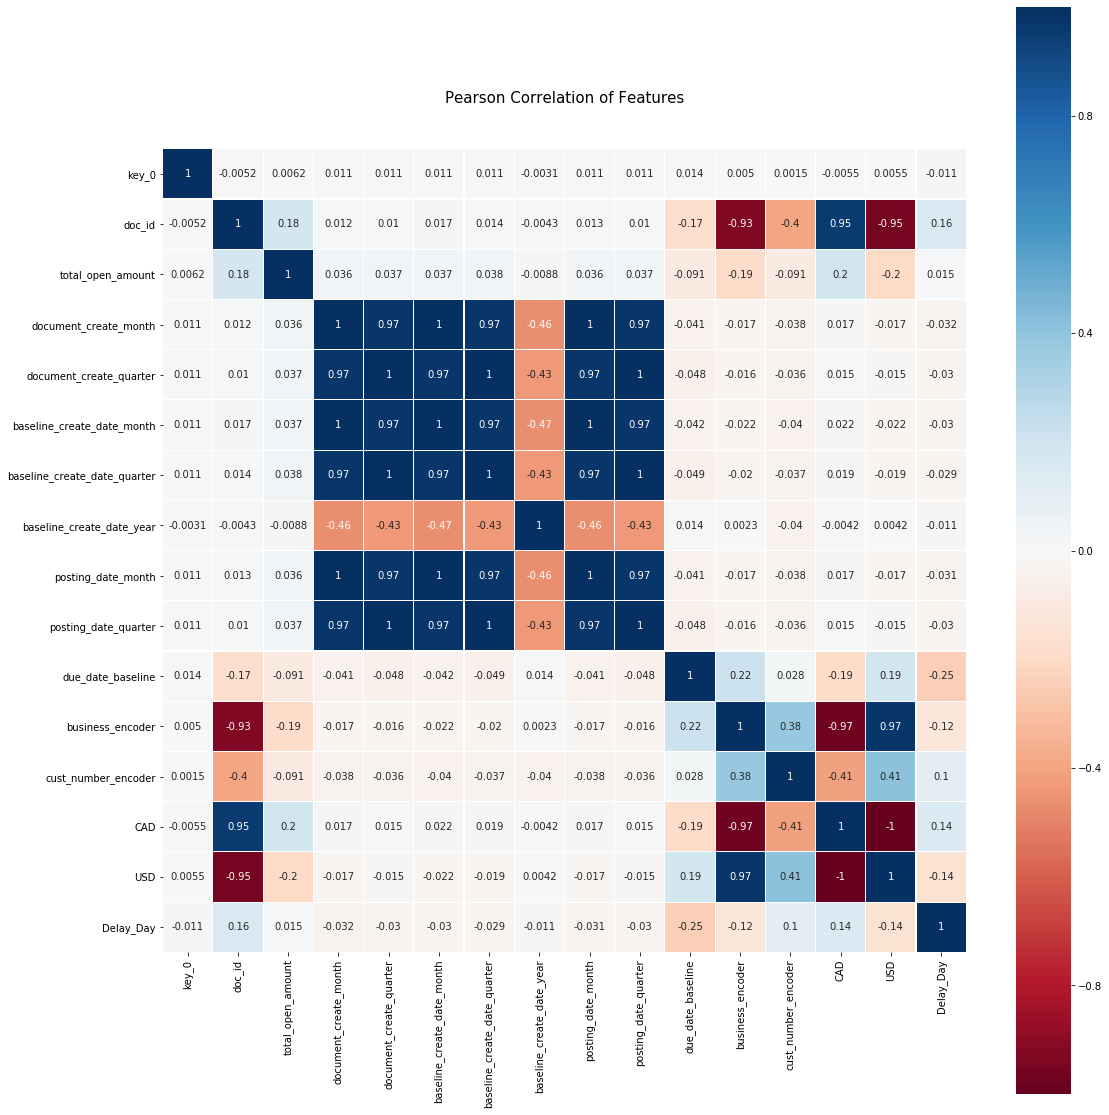

In [84]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [85]:
# Converting total_open_amount to logarithmic_base to increase accuracy

x_train['logarithm_base'] = np.log2(x_train['total_open_amount'])
x_test['logarithm_base'] = np.log2(x_test['total_open_amount'])
x_val['logarithm_base'] = np.log2(x_val['total_open_amount'])

In [86]:
# Dropping cust_number_encoder

x_train.drop(['cust_number_encoder'],axis = 1, inplace = True)
x_val.drop(['cust_number_encoder'],axis = 1, inplace = True)
x_test.drop(['cust_number_encoder'],axis = 1, inplace = True)

In [87]:
# Dropping total_open_amount

#x_train.drop(['total_open_amount'],axis = 1, inplace = True)
#x_val.drop(['total_open_amount'],axis = 1, inplace = True)
#x_test.drop(['total_open_amount'],axis = 1, inplace = True)

In [88]:
x_train.shape, x_val.shape, x_test.shape

((28000, 14), (6000, 14), (6000, 14))

# Modeling

## Importing Libraries

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
MSE_Score = []
R2_Score = []
Algorithm = []

### Linear Regression

In [91]:
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted1 = clf.predict(x_test)

In [92]:
MSE_Score.append(mean_squared_error(y_test, predicted1))
R2_Score.append(r2_score(y_test, predicted1)*100)

### Decision Tree Regressor

In [93]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(random_state = 0, max_depth=5)
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted2 = clf.predict(x_test)

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted2))
R2_Score.append(r2_score(y_test, predicted2)*100)

### Random Forest Regressor

In [95]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor(n_jobs=-1,n_estimators=200,max_depth=5)
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted3 = clf.predict(x_test)

In [96]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted3))
R2_Score.append(r2_score(y_test, predicted3)*100)

### ScoreCard

In [97]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [98]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,118.466234,11.347983
1,Decision Tree Regressor,99.489410,25.548938
2,Random Forest Regressor,96.867274,27.511165


# Operations main_Test

## Pre-Processing

In [99]:
main_Test.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

## Drop

In [100]:
## Drop null Values


main_Test.drop(['clear_date','area_business'],axis=1, inplace=True)

## Convert to Object to DateTime

In [101]:
main_Test['document_create_date'] = pd.to_datetime(main_Test['document_create_date'],format='%Y%m%d')
main_Test['document_create_date.1'] = pd.to_datetime(main_Test['document_create_date.1'],format='%Y%m%d')
main_Test['due_in_date'] = pd.to_datetime(main_Test['due_in_date'],format='%Y%m%d')
main_Test['baseline_create_date'] = pd.to_datetime(main_Test['baseline_create_date'],format='%Y%m%d')
main_Test['posting_date'] = pd.to_datetime(main_Test['posting_date'])
main_Test.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200418007,AM corporation,2020.0,1.930839e+09,2020-05-07,2020-05-04,2020-05-07,2020-05-22,USD,RV,1.0,4277.81,2020-05-07,NAA8,1.930839e+09,1
11,CA02,CCU001,KRAFT us,2020.0,2.960624e+09,2020-03-25,2020-03-25,2020-03-25,2020-05-01,CAD,RV,1.0,17336.88,2020-03-27,NAG2,2.960624e+09,1
13,U001,0200769623,WAL-MAR llc,2020.0,1.930646e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,USD,RV,1.0,16361.42,2020-03-12,NAH4,1.930646e+09,1
14,U001,0200020431,DEC foundation,2020.0,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-04-23,USD,RV,1.0,14538.19,2020-04-16,NAM1,1.930818e+09,1
20,U001,0200803720,DEC co,2020.0,1.930820e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-09,USD,RV,1.0,1171.00,2020-04-16,NAM4,1.930820e+09,1


## Sorting 

In [102]:
main_Test.sort_values(by='posting_date')
main_Test.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200418007,AM corporation,2020.0,1.930839e+09,2020-05-07,2020-05-04,2020-05-07,2020-05-22,USD,RV,1.0,4277.81,2020-05-07,NAA8,1.930839e+09,1
11,CA02,CCU001,KRAFT us,2020.0,2.960624e+09,2020-03-25,2020-03-25,2020-03-25,2020-05-01,CAD,RV,1.0,17336.88,2020-03-27,NAG2,2.960624e+09,1
13,U001,0200769623,WAL-MAR llc,2020.0,1.930646e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,USD,RV,1.0,16361.42,2020-03-12,NAH4,1.930646e+09,1
14,U001,0200020431,DEC foundation,2020.0,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-04-23,USD,RV,1.0,14538.19,2020-04-16,NAM1,1.930818e+09,1
20,U001,0200803720,DEC co,2020.0,1.930820e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-09,USD,RV,1.0,1171.00,2020-04-16,NAM4,1.930820e+09,1


## Converting date into day, month, dayofweek, quarter, year 

In [103]:
main_Test['document_create_daysOfWeek']=main_Test['document_create_date.1'].dt.dayofweek
main_Test['document_create_day']=main_Test['document_create_date.1'].dt.day
main_Test['document_create_month']=main_Test['document_create_date.1'].dt.month
main_Test['document_create_quarter']=main_Test['document_create_date.1'].dt.quarter
main_Test['document_create_year']=main_Test['document_create_date.1'].dt.year

In [104]:
main_Test['baseline_create_date_daysOfWeek']=main_Test['baseline_create_date'].dt.dayofweek
main_Test['baseline_create_date_day']=main_Test['baseline_create_date'].dt.day
main_Test['baseline_create_date_month']=main_Test['baseline_create_date'].dt.month
main_Test['baseline_create_date_quarter']=main_Test['baseline_create_date'].dt.quarter
main_Test['baseline_create_date_year']=main_Test['baseline_create_date'].dt.year

In [105]:
main_Test['posting_date_daysOfWeek']=main_Test['posting_date'].dt.dayofweek
main_Test['posting_date_day']=main_Test['posting_date'].dt.day
main_Test['posting_date_month']=main_Test['posting_date'].dt.month
main_Test['posting_date_quarter']=main_Test['posting_date'].dt.quarter
main_Test['posting_date_year']=main_Test['posting_date'].dt.year

In [106]:
main_Test["due_date_baseline"] = (main_Test["due_in_date"] - main_Test["baseline_create_date"]).dt.days

In [107]:
# After converting delete the datetime 

main_Test.drop(['baseline_create_date','document type' ,'document_create_date.1','document_create_date'], axis=1, inplace=True)

In [108]:
# Those element whose is less in count put it into "Others"

main_Test = main_Test.replace(['U002','U005','U007'],'Others')

### LabelEncoding on "business_code"

In [109]:
from sklearn import preprocessing

business_encoder = preprocessing.LabelEncoder()
business_encoder.fit(main_Test['business_code'])

LabelEncoder()

In [110]:
main_Test['business_encoder'] = business_encoder.fit_transform(main_Test['business_code']).astype(np.int64)

In [111]:
# Those element whose is less in count put it into "Others"

main_Test = main_Test.replace(['NAVD', 'NAVL', 'NA3F', 'NA9X', 'NAUP', 'NAD8', 'NAWM', 'NAM3', 'NAV9', 'BR12', 'B112', 'NAVC', 'NAV2', 'NA31', 'NAUW', 'NAUN', 'NATU', 'B052', 'CAB1', 'BR56', 'NATL', 'NACE', 'NAUI', 'NATY', 'NAUY', 'NANC', 'NA25', 'NATW', 'NATK', 'NATH', 'NATV', 'NA8Q', 'NATM', 'NATZ'],'Others')

### LabelEncode on "cust_payment_terms" 

In [112]:
from sklearn import preprocessing

curt_payment_encoder = preprocessing.LabelEncoder()
curt_payment_encoder.fit(main_Test['cust_payment_terms'])

LabelEncoder()

In [113]:
main_Test['curt_payment_encoder'] = curt_payment_encoder.fit_transform(main_Test['cust_payment_terms']).astype(np.int64)

In [114]:
# Dropping columns after LabelEncoding

main_Test.drop(['business_code','posting_date','cust_payment_terms'], axis = 1, inplace = True)

In [115]:
# Dropping name_customer

name_cust = main_Test['name_customer']

main_Test.drop(['name_customer'], axis = 1, inplace= True)

### LabelEncode on "cust_number"

In [116]:
from sklearn import preprocessing

cust_number_encoder = preprocessing.LabelEncoder()
cust_number_encoder.fit(main_Test['cust_number'])

LabelEncoder()

In [117]:
main_Test['cust_number_encoder'] = cust_number_encoder.fit_transform(main_Test['cust_number']).astype(np.int64)

In [118]:
# Dropping after LabelEncoding of cust_number

num_cust = main_Test['cust_number'];
main_Test.drop(['cust_number'], axis = 1,  inplace = True)

### Making Dummies of invoice_currency

In [119]:
data = pd.get_dummies(main_Test['invoice_currency'])

In [120]:
main_Test = main_Test.merge(data,on=main_Test.index)

In [121]:
#drop after making dummies of invoice_currency

main_Test.drop('invoice_currency', axis = 1, inplace = True)

In [122]:
# Copy due_in_date in due_date

due_date = main_Test['due_in_date']

In [123]:
# drop due_in_date

main_Test.drop('due_in_date', axis = 1, inplace=True)

In [124]:
main_Test.drop('key_0',axis =1, inplace = True)

### Correlation

In [125]:
main_Test.corr()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,document_create_daysOfWeek,document_create_day,document_create_month,document_create_quarter,...,posting_date_day,posting_date_month,posting_date_quarter,posting_date_year,due_date_baseline,business_encoder,curt_payment_encoder,cust_number_encoder,CAD,USD
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,1.000000,NaN,0.191964,1.000000,NaN,0.004922,-0.002199,-0.022659,-0.016254,...,-0.002199,-0.022659,-0.016254,NaN,-0.185876,-0.980513,-0.453729,-0.378588,0.999765,-0.999765
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,NaN,0.191964,NaN,1.000000,0.191964,NaN,0.002190,0.013764,0.000811,0.013824,...,0.013764,0.000811,0.013824,NaN,-0.118801,-0.193593,-0.268114,-0.063657,0.192585,-0.192585
invoice_id,NaN,1.000000,NaN,0.191964,1.000000,NaN,0.004922,-0.002199,-0.022659,-0.016254,...,-0.002199,-0.022659,-0.016254,NaN,-0.185876,-0.980513,-0.453729,-0.378588,0.999765,-0.999765
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
document_create_daysOfWeek,NaN,0.004922,NaN,0.002190,0.004922,NaN,1.000000,-0.030837,-0.023219,0.003768,...,-0.030837,-0.023219,0.003768,NaN,-0.033625,-0.002754,0.087988,0.048902,0.004585,-0.004585
document_create_day,NaN,-0.002199,NaN,0.013764,-0.002199,NaN,-0.030837,1.000000,-0.404740,-0.270680,...,1.000000,-0.404740,-0.270680,NaN,-0.027814,0.002740,-0.024164,0.018462,-0.002196,0.002196
document_create_month,NaN,-0.022659,NaN,0.000811,-0.022659,NaN,-0.023219,-0.404740,1.000000,0.883608,...,-0.404740,1.000000,0.883608,NaN,-0.089414,0.016811,0.017553,0.037594,-0.021780,0.021780
document_create_quarter,NaN,-0.016254,NaN,0.013824,-0.016254,NaN,0.003768,-0.270680,0.883608,1.000000,...,-0.270680,0.883608,1.000000,NaN,-0.080380,0.011638,-0.011179,-0.014751,-0.015419,0.015419


In [126]:
# Dropping those column whose correlation is less

main_Test.drop(['buisness_year','document_create_daysOfWeek','document_create_day','document_create_year','baseline_create_date_daysOfWeek','baseline_create_date_day','posting_date_daysOfWeek','posting_date_day','posting_date_year','curt_payment_encoder'], axis=1, inplace = True)

In [127]:
# converting total_open_amount to logarithm_base

main_Test['logarithm_base'] = np.log2(main_Test['total_open_amount'])

In [128]:
#Dropping of cust_number_encoder
main_Test.drop(['cust_number_encoder'],axis = 1, inplace = True)

In [129]:
#Dropping of total_open_amount 

#main_Test.drop(['total_open_amount'],axis = 1, inplace = True)

### Variance Threshold

In [130]:
from sklearn.feature_selection import VarianceThreshold
vts = VarianceThreshold(threshold=0.01)

In [131]:
vts.fit(main_Test)

VarianceThreshold(threshold=0.01)

In [132]:
main_Test.columns[list(vts.get_support())]

Index(['doc_id', 'total_open_amount', 'invoice_id', 'document_create_month',
       'document_create_quarter', 'baseline_create_date_month',
       'baseline_create_date_quarter', 'posting_date_month',
       'posting_date_quarter', 'due_date_baseline', 'business_encoder', 'CAD',
       'USD', 'logarithm_base'],
      dtype='object')

In [133]:
main_Test.columns

Index(['doc_id', 'posting_id', 'total_open_amount', 'invoice_id', 'isOpen',
       'document_create_month', 'document_create_quarter',
       'baseline_create_date_month', 'baseline_create_date_quarter',
       'baseline_create_date_year', 'posting_date_month',
       'posting_date_quarter', 'due_date_baseline', 'business_encoder', 'CAD',
       'USD', 'logarithm_base'],
      dtype='object')

## Import Libraries

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [135]:
open_cv = main_Test[x_train.keys()]

In [136]:
# predicting
predicted = clf.predict(open_cv).astype('int')

In [137]:
#Our predicted value
predicted

array([0, 5, 0, ..., 0, 0, 5])

In [138]:
main_Test.head()

,doc_id,posting_id,total_open_amount,invoice_id,isOpen,document_create_month,document_create_quarter,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_year,posting_date_month,posting_date_quarter,due_date_baseline,business_encoder,CAD,USD,logarithm_base
0,1.930839e+09,1.0,4277.81,1.930839e+09,1,5,2,5,2,2020,5,2,15,2,0,1,12.062657
1,2.960624e+09,1.0,17336.88,2.960624e+09,1,3,1,3,1,2020,3,1,35,0,1,0,14.081557
2,1.930646e+09,1.0,16361.42,1.930646e+09,1,3,1,3,1,2020,3,1,15,2,0,1,13.998010
3,1.930818e+09,1.0,14538.19,1.930818e+09,1,4,2,4,2,2020,4,2,7,2,0,1,13.827560
4,1.930820e+09,1.0,1171.00,1.930820e+09,1,4,2,4,2,2020,4,2,23,2,0,1,10.193525


In [139]:
# Adding of due_date column in main_Test

main_Test['due_date'] = due_date

In [140]:
main_Test.head()

,doc_id,posting_id,total_open_amount,invoice_id,isOpen,document_create_month,document_create_quarter,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_year,posting_date_month,posting_date_quarter,due_date_baseline,business_encoder,CAD,USD,logarithm_base,due_date
0,1.930839e+09,1.0,4277.81,1.930839e+09,1,5,2,5,2,2020,5,2,15,2,0,1,12.062657,2020-05-22
1,2.960624e+09,1.0,17336.88,2.960624e+09,1,3,1,3,1,2020,3,1,35,0,1,0,14.081557,2020-05-01
2,1.930646e+09,1.0,16361.42,1.930646e+09,1,3,1,3,1,2020,3,1,15,2,0,1,13.998010,2020-03-27
3,1.930818e+09,1.0,14538.19,1.930818e+09,1,4,2,4,2,2020,4,2,7,2,0,1,13.827560,2020-04-23
4,1.930820e+09,1.0,1171.00,1.930820e+09,1,4,2,4,2,2020,4,2,23,2,0,1,10.193525,2020-05-09


### Predicting our clear_date

In [141]:
main_Test["clear_date_prediction"] = main_Test["due_date"] + pd.to_timedelta(predicted,unit='d')

In [142]:
main_Test.head()

,doc_id,posting_id,total_open_amount,invoice_id,isOpen,document_create_month,document_create_quarter,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_year,posting_date_month,posting_date_quarter,due_date_baseline,business_encoder,CAD,USD,logarithm_base,due_date,clear_date_prediction
0,1.930839e+09,1.0,4277.81,1.930839e+09,1,5,2,5,2,2020,5,2,15,2,0,1,12.062657,2020-05-22,2020-05-22
1,2.960624e+09,1.0,17336.88,2.960624e+09,1,3,1,3,1,2020,3,1,35,0,1,0,14.081557,2020-05-01,2020-05-06
2,1.930646e+09,1.0,16361.42,1.930646e+09,1,3,1,3,1,2020,3,1,15,2,0,1,13.998010,2020-03-27,2020-03-27
3,1.930818e+09,1.0,14538.19,1.930818e+09,1,4,2,4,2,2020,4,2,7,2,0,1,13.827560,2020-04-23,2020-04-23
4,1.930820e+09,1.0,1171.00,1.930820e+09,1,4,2,4,2,2020,4,2,23,2,0,1,10.193525,2020-05-09,2020-05-07


### Creating Bucket

In [145]:
main_Test["bucket"] = pd.cut(predicted,[float("-inf"),0,15.,30.,45.,float("inf")],labels=["<0","0-15","16-30","31-45","45<"])

In [146]:
main_Test.head()

,doc_id,posting_id,total_open_amount,invoice_id,isOpen,document_create_month,document_create_quarter,baseline_create_date_month,baseline_create_date_quarter,baseline_create_date_year,posting_date_month,posting_date_quarter,due_date_baseline,business_encoder,CAD,USD,logarithm_base,due_date,clear_date_prediction,bucket
0,1.930839e+09,1.0,4277.81,1.930839e+09,1,5,2,5,2,2020,5,2,15,2,0,1,12.062657,2020-05-22,2020-05-22,<0
1,2.960624e+09,1.0,17336.88,2.960624e+09,1,3,1,3,1,2020,3,1,35,0,1,0,14.081557,2020-05-01,2020-05-06,0-15
2,1.930646e+09,1.0,16361.42,1.930646e+09,1,3,1,3,1,2020,3,1,15,2,0,1,13.998010,2020-03-27,2020-03-27,<0
3,1.930818e+09,1.0,14538.19,1.930818e+09,1,4,2,4,2,2020,4,2,7,2,0,1,13.827560,2020-04-23,2020-04-23,<0
4,1.930820e+09,1.0,1171.00,1.930820e+09,1,4,2,4,2,2020,4,2,23,2,0,1,10.193525,2020-05-09,2020-05-07,<0


## The End

In [147]:
# # Export Predicted Date
main_Test.drop(['doc_id','posting_id','isOpen','document_create_month','document_create_quarter','baseline_create_date_month','baseline_create_date_quarter','baseline_create_date_year','posting_date_month','posting_date_quarter','due_date_baseline','business_encoder','CAD','USD','logarithm_base'], axis = 1, inplace= True)


In [148]:
# print(main_Test.columns)
main_Test.head()

,total_open_amount,invoice_id,due_date,clear_date_prediction,bucket
0,4277.81,1.930839e+09,2020-05-22,2020-05-22,<0
1,17336.88,2.960624e+09,2020-05-01,2020-05-06,0-15
2,16361.42,1.930646e+09,2020-03-27,2020-03-27,<0
3,14538.19,1.930818e+09,2020-04-23,2020-04-23,<0
4,1171.00,1.930820e+09,2020-05-09,2020-05-07,<0


In [149]:
final_data = main_Test.merge(name_cust , on = main_Test.index)

In [150]:
final_data.drop(['key_0'], axis=1, inplace=True)

In [151]:
final_data = main_Test.merge(num_cust , on = final_data.index)

In [152]:
final_data.drop(['key_0'], axis=1, inplace=True)

In [153]:
final_data = final_data.merge(name_cust , on = final_data.index)
final_data.head()

,key_0,total_open_amount,invoice_id,due_date,clear_date_prediction,bucket,cust_number,name_customer
0,0,4277.81,1.930839e+09,2020-05-22,2020-05-22,<0,0200418007,AM corporation
1,1,17336.88,2.960624e+09,2020-05-01,2020-05-06,0-15,CCU001,KRAFT us
2,2,16361.42,1.930646e+09,2020-03-27,2020-03-27,<0,0200769623,WAL-MAR llc
3,3,14538.19,1.930818e+09,2020-04-23,2020-04-23,<0,0200020431,DEC foundation
4,4,1171.00,1.930820e+09,2020-05-09,2020-05-07,<0,0200803720,DEC co


In [154]:
final_data.drop(['key_0'], axis=1, inplace=True)


In [155]:
final_data.rename(columns = {'due_date':'due_in_date' , 'clear_date_prediction':'clear_date', 'bucket':'Notes'}, inplace = True)

In [156]:
final_data.head()

,total_open_amount,invoice_id,due_in_date,clear_date,Notes,cust_number,name_customer
0,4277.81,1.930839e+09,2020-05-22,2020-05-22,<0,0200418007,AM corporation
1,17336.88,2.960624e+09,2020-05-01,2020-05-06,0-15,CCU001,KRAFT us
2,16361.42,1.930646e+09,2020-03-27,2020-03-27,<0,0200769623,WAL-MAR llc
3,14538.19,1.930818e+09,2020-04-23,2020-04-23,<0,0200020431,DEC foundation
4,1171.00,1.930820e+09,2020-05-09,2020-05-07,<0,0200803720,DEC co


In [157]:
final_data.to_csv('final_data.csv');